# Star Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

# Import Modules

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [2]:
hotel_data = pd.read_csv('/Users/chydynma/Downloads/StarHotelsGroup.csv')
hotel_data.head() # view the first five rows of the dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [3]:
# Understanding the sahape of the dataset
hotel_data.shape

(56926, 18)

* There are 56,926 rows and 18 columns 

In [4]:
# copying data to another variable to avoid any changes to original data
df = hotel_data.copy()

In [5]:
# information about the columns in the dataset
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

- **Catergorical variables**: type_of_meal_plan, room_type_reserved, market_segment_type, booking_status

- **Numerical variables**: no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month,  arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room,  no_of_special_requests     

In [6]:
# checking for duplicates
hotel_data[hotel_data.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

* There are 14350 duplicates.

In [7]:
# dropping duplicates
hotel_data.drop_duplicates(inplace=True)

In [8]:
# New shape of dataset
hotel_data.shape

(42576, 18)

* 42576 rows and 18columns

In [9]:
# checking for missing values
hotel_data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values.

In [10]:
# Summary of dataset
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,0.142146,0.459920,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.0,0.0,0.0,1.0
lead_time,42576.0,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0
arrival_date,42576.0,15.682873,8.813991,1.0,8.0,16.0,23.0,31.0
repeated_guest,42576.0,0.030886,0.173011,0.0,0.0,0.0,0.0,1.0


* The following no_of_children, no_of_weekend_nights, no_of_week_night, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, required_car_parking_space, no_of_special_requests columns have only a maximum value. This shows that these features contribute to the decision of cancellation only in very few cases.

#### Assumptions about impact of features:

* High: lead_time, arrival_year, arrival__month, no_of_weekend_nights, no_of_week_nights, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, room_type_reserved

* Medium: no_of_children, avg_price_per_room

* Low: arrival_date, type_of_meal_plan, no_of_adults, market_segment_type, required_car_parking_space, no_of_special_requests

#### Assumptions about cancellation

* Customers who have bookings for longer durations have lesser chance of cancelling their booking.
* As more children are involved in the booking, higher chances of cancellation.
* Old guest (repeated_guest=1) is less likely to cancel current booking.
* If there are high previous cancellations, possibility of cancellation of current booking is also high.
* If room assigned is not the same as reserved room type, customer might positively cancel the booking.
* If room assigned is not the same as reserved room type, customer might positively cancel the booking.

In [11]:
# Setting the random seed through np.random.seed so as to get same result every time
# lets look at 10 random rows
np.random.seed(1)
hotel_data.sample(n=10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
50934,1,0,1,0,Meal Plan 1,0,Room_Type 1,3,2018,3,21,Corporate,0,0,0,79.00,0,Not_Canceled
42266,2,0,1,3,Meal Plan 1,0,Room_Type 1,4,2018,6,2,Online,0,0,0,128.59,1,Not_Canceled
34994,1,0,0,3,Meal Plan 1,0,Room_Type 1,80,2018,12,7,Online,0,0,0,86.40,2,Not_Canceled
14547,2,0,0,2,Meal Plan 1,0,Room_Type 1,217,2018,9,15,Online,0,0,0,126.90,2,Canceled
32158,3,0,2,2,Meal Plan 1,0,Room_Type 1,34,2019,3,5,Offline,0,0,0,110.00,0,Not_Canceled
53837,3,0,1,2,Meal Plan 1,0,Room_Type 4,101,2019,8,18,Online,0,0,0,195.00,1,Not_Canceled
14845,2,0,2,1,Meal Plan 1,0,Room_Type 4,118,2018,10,29,Online,0,0,0,104.40,1,Not_Canceled
5656,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2019,5,9,Online,0,0,0,510.00,0,Canceled
35144,2,0,0,3,Meal Plan 1,0,Room_Type 1,157,2018,6,7,Online,0,0,0,113.10,0,Canceled
15586,2,1,2,2,Meal Plan 1,0,Room_Type 1,216,2019,8,26,Online,0,0,0,93.60,0,Canceled


In [12]:
# print columns with categorical data.

print(hotel_data.type_of_meal_plan.value_counts())
print(hotel_data.room_type_reserved.value_counts())
print(hotel_data.market_segment_type.value_counts())
print(hotel_data.booking_status.value_counts())

Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
Room_Type 1    29730
Room_Type 4     9369
Room_Type 6     1540
Room_Type 5      906
Room_Type 2      718
Room_Type 7      307
Room_Type 3        6
Name: room_type_reserved, dtype: int64
Online           34169
Offline           5777
Corporate         1939
Complementary      496
Aviation           195
Name: market_segment_type, dtype: int64
Not_Canceled    28089
Canceled        14487
Name: booking_status, dtype: int64


In [13]:
# viewing the details of arrival_month column
print(hotel_data.arrival_month.value_counts())

8     5312
7     4725
5     4348
4     4227
6     4073
3     4044
10    3209
9     3057
2     2889
12    2385
11    2192
1     2115
Name: arrival_month, dtype: int64


In [14]:
# replacing the values in arrival month column with the actual months of the year
# This will be used to answer some of the EDA questions
replaceStruct = {"arrival_month": {1 :"January", 2 : "February", 3 : "March", 4: "April", 
                                   5: "May", 6: "June", 7: "July", 8: "August", 
                                   9: "September", 10: "October", 11: "November", 12: "December"}}
df = hotel_data.replace(replaceStruct)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,October,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,November,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,February,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,May,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,July,13,Online,0,0,0,89.10,2,Canceled


In [15]:
# replacing categorical values with values in an ordering form 0,1,2,3 etc.
replaceStruct = {"booking_status": {"Not_Canceled": 0, "Canceled": 1},
                 "type_of_meal_plan": {"Not Selected": -1, "Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3": 3},
                 "room_type_reserved": {"Room_Type 1": 1, "Room_Type 2": 2, "Room_Type 3": 3, "Room_Type 4": 4, 
                                        "Room_Type 5": 5, "Room_Type 6": 6, "Room_Type 7":7},
                 "market_segment_type": {"Offline": 1, "Online": 2, "Corporate": 2, "Complementary": 4, "Aviation": 5}
                }

In [16]:
hotel_data1 =hotel_data.replace(replaceStruct)
hotel_data1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,0
1,2,0,2,3,-1,0,1,5,2018,11,6,2,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,1
4,3,0,0,3,-1,0,1,277,2019,7,13,2,0,0,0,89.10,2,1


In [17]:
hotel_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  int64  
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  int64  
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

# Exploratory Data Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(feature,data=hotel_data1,figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (5,4))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.20, .70)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

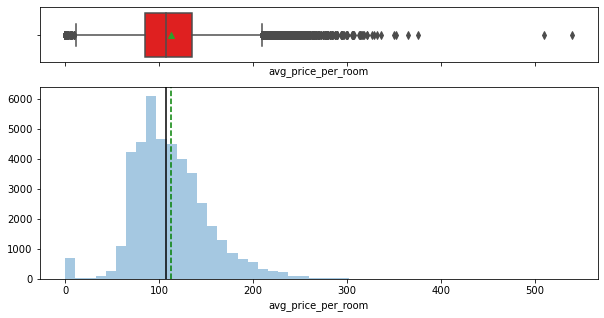

In [21]:
# A histogram and boxplot to view the avg price per room
histogram_boxplot(df["avg_price_per_room"])

* From the above we see some outliers which indicates Skweness to the right.
* Also more prices are higher.
* Average price is 112 euros.

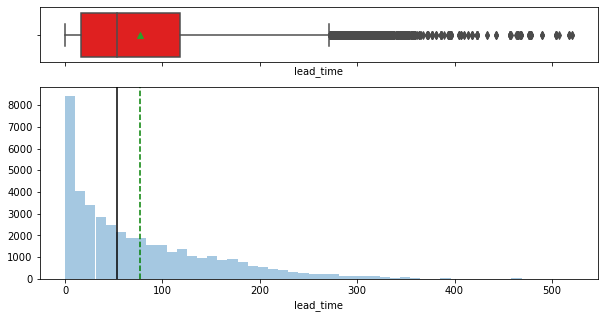

In [22]:
histogram_boxplot(df["lead_time"])

- Most guest have short lead time from booking to arrival. As seen above, a high number of guest are on the 0 mark on the lead time axis. 
- Average lead time is 77.3

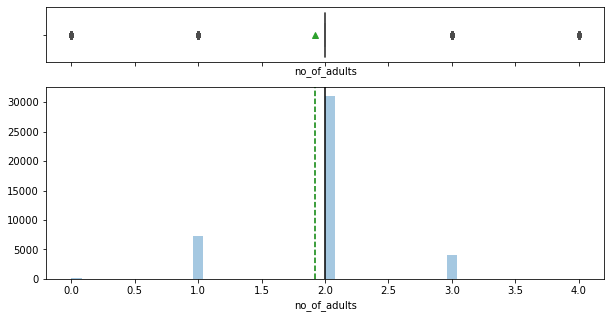

In [23]:
histogram_boxplot(df["no_of_adults"])

- The avaerage number of adults is ~2. This indicates most guests are in pairs with a partern.

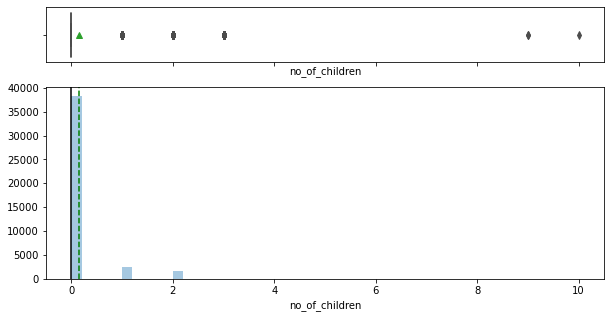

In [24]:
histogram_boxplot(df["no_of_children"])

#### 1. What are the busiest months in the hotel?

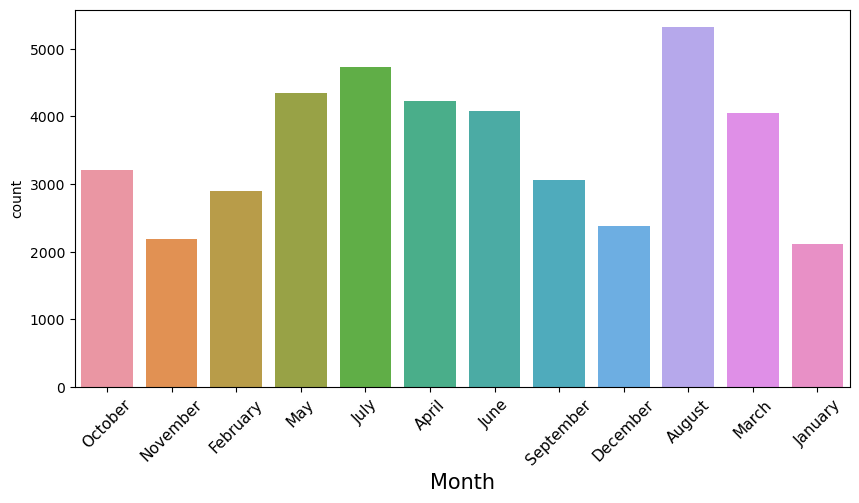

In [25]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=df, x = 'arrival_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

* The above plot shows that August was the busiest month and January was the least.

#### 2. Which market segment do most of the guests come from?

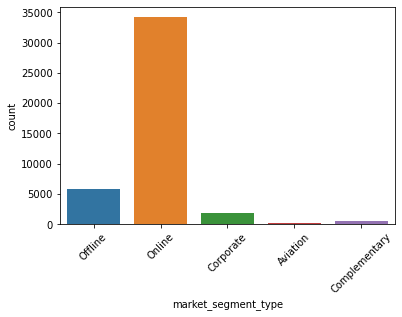

In [26]:
sns.countplot(data=df, x= 'market_segment_type')
plt.xticks(rotation=45,fontsize=10);

* The current use of technology is massively increasing. From the above the plot, the highest booking was done online.

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<AxesSubplot:xlabel='room_type_reserved', ylabel='avg_price_per_room'>

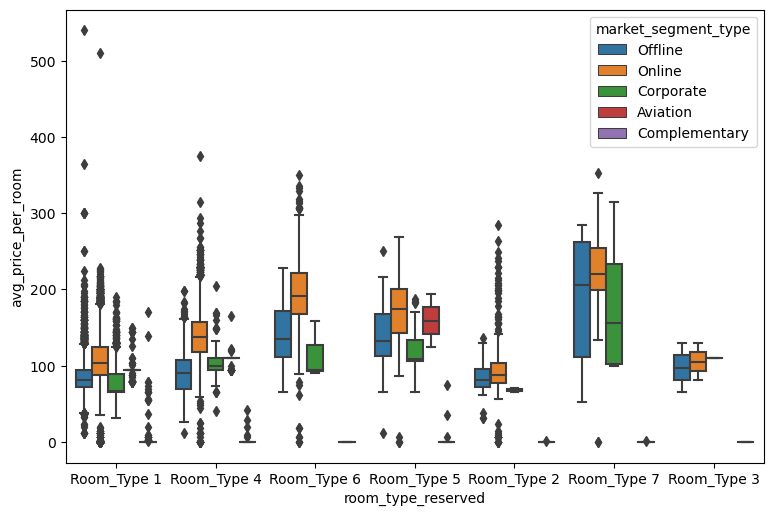

In [27]:
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= df, x = 'room_type_reserved', y = 'avg_price_per_room', hue = 'market_segment_type')

* The complementary guest have the lowest avg price per room.
* The guest that booked online have the highest avg price per room.
* Aviation segment is next to online as per avg pricr per room.
* Others like offline and corporate.

#### 4. What percentage of bookings are canceled?

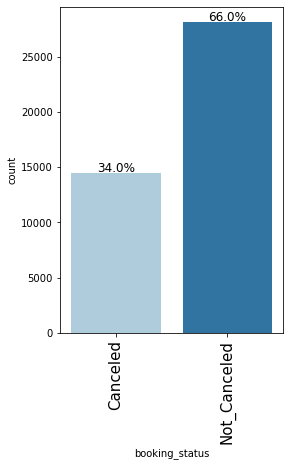

In [28]:
labeled_barplot(df, "booking_status", perc=True)

* ~38% of bookings are canceled while 62% are not.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

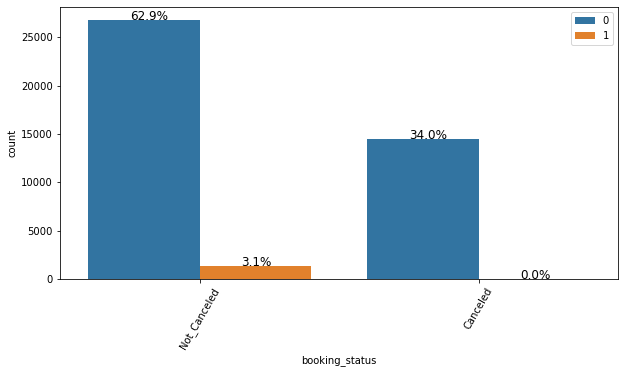

In [29]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="booking_status", hue="repeated_guest")
plt.xticks(rotation=60)
plt.legend(loc=1)
bar_perc(ax,df['booking_status'])
plt.show()

* 2.4% of repeated guest did not cancel
* 0% i.e. none of the repeated guest canceled

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

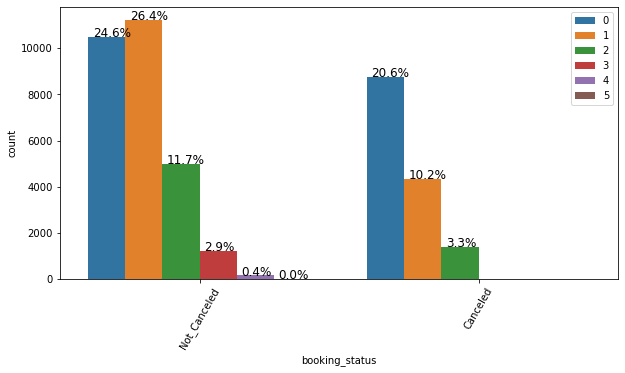

In [30]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="booking_status", hue="no_of_special_requests")
plt.xticks(rotation=60)
plt.legend(loc=1)
bar_perc(ax,df['booking_status'])
plt.show()

* Special requirements placed by the customers have asignificant role it place on booking cancellation.
* From the above, guests who did not cancel have higer percentages in the various catergories of requirements.
* For cancelled bookings, there less requirements.

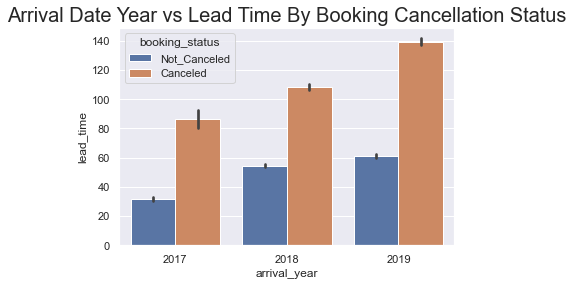

In [31]:
# Arrival Date Year vs. Lead Time By Booking Cancellation Status
sns.set(style = "darkgrid")
plt.title("Arrival Date Year vs Lead Time By Booking Cancellation Status", fontdict = {'fontsize': 20})
ax = sns.barplot(x = "arrival_year", y = "lead_time" ,hue = 'booking_status', data = df)

- For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

### Bivariate Analysis

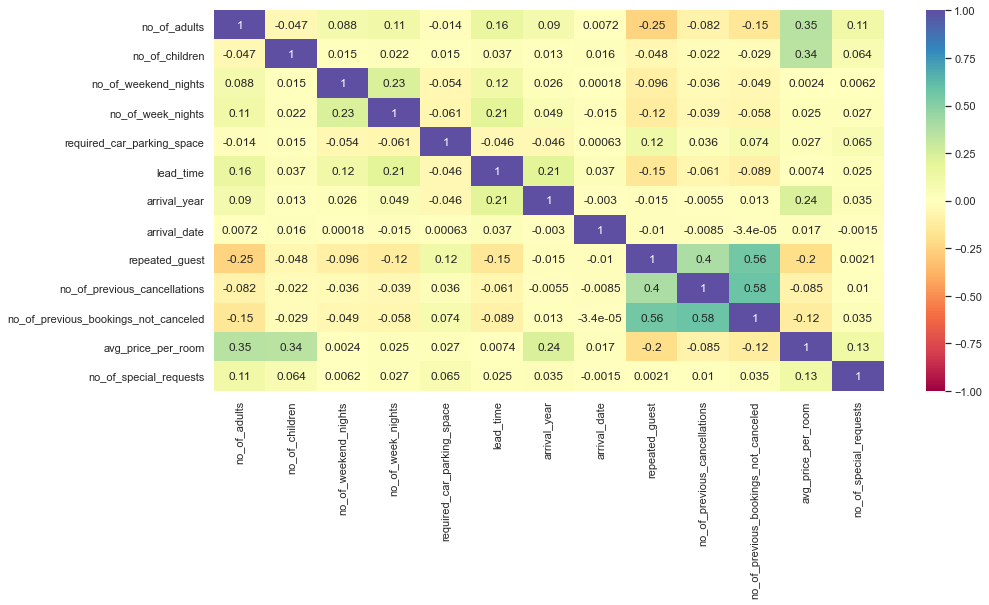

In [32]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* There is a slight correlation between repeated guest and no. of previous bookings not canceled.
* Same applies between no. of previous cancellation and no. of previous bookings not canceled, slight correlation.
* This means regular guest do not usually cancel bookings
* arrival month and arrival year is negatively correlated.

### Data Pre-Processing

In [33]:
# checking for missing values
hotel_data1.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values

#### Fixing the data types

In [34]:
#converting the required object type feature to categorical
categorical_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
hotel_data1[categorical_features]=hotel_data1[categorical_features].astype('category')

In [35]:
hotel_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

**Outliers detection using boxplot**

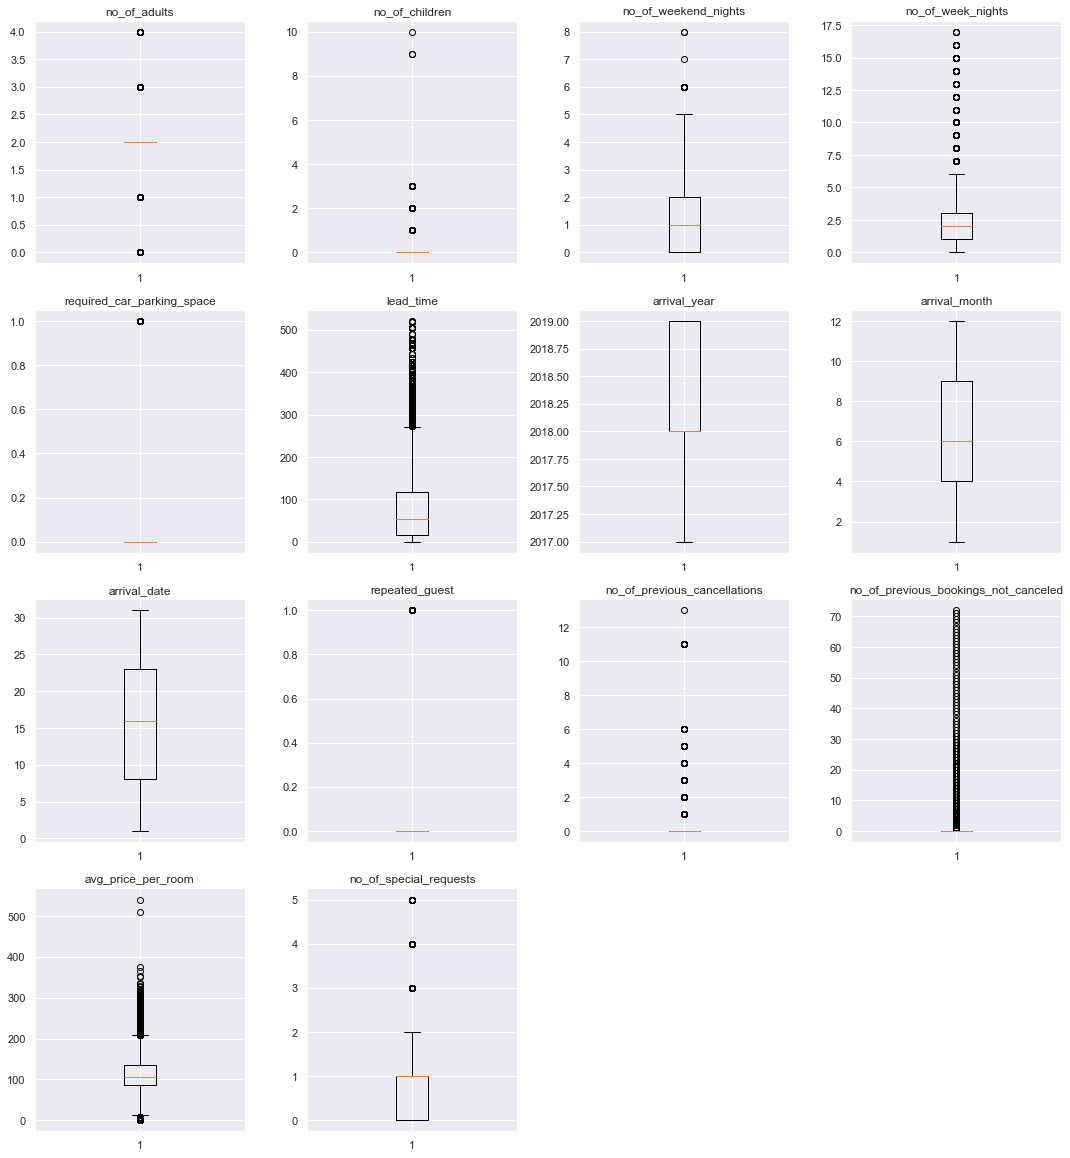

In [36]:
numerical_col = hotel_data1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(hotel_data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All the above columns have upper outliers except arrival year and arrival date.
* While average price per room, no. of adults and no. of children have lower outliers.
* We would not be treating the outliers to check for multicollinearity.

In [37]:
# Lets check the 5 point summary of the data
hotel_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,0.142146,0.459920,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.0,0.0,0.0,1.0
lead_time,42576.0,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0
arrival_date,42576.0,15.682873,8.813991,1.0,8.0,16.0,23.0,31.0
repeated_guest,42576.0,0.030886,0.173011,0.0,0.0,0.0,0.0,1.0


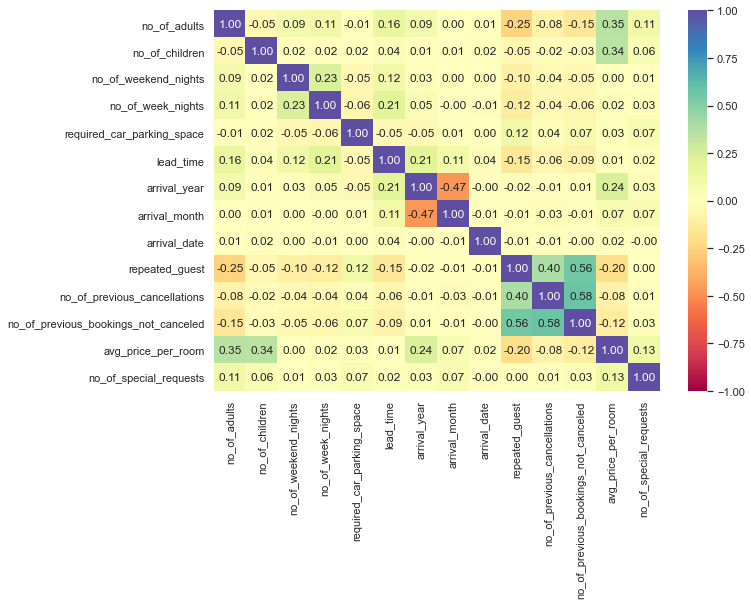

In [38]:
#heatmap showing the degree of correlation of columns
plt.figure(figsize=(10,7))
sns.heatmap(hotel_data1.corr(), annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* no real changes since their is no null value and outliers were not removed.

**Creating training and test sets.**

In [39]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    hotel_data1,
    columns=[
        "type_of_meal_plan",
        "booking_status",
        "room_type_reserved",
        "market_segment_type",
    ],
)
dummy_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_-1,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,booking_status_0,booking_status_1,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_1,market_segment_type_2,market_segment_type_4,market_segment_type_5
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,3,0,0,3,0,277,2019,7,13,0,0,0,89.10,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [40]:
X = hotel_data1.drop(["booking_status"], axis=1)  # Features
y = hotel_data1["booking_status"]

print(X.head())
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0                 1                           0                  1        224   
1                -1                           0                  1          5   
2                 1                           0                  1          1   
3                 1                           0                  1        211   
4                -1                           0                  1        277   

   arrival_year  arrival_month  arrival_date market_segm

In [41]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 17)
Shape of test set :  (12773, 17)
Percentage of classes in training set:
0    0.661074
1    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.656619
1    0.343381
Name: booking_status, dtype: float64


* 29,803 rows and 17 columns in the Training set
* 12,773 rows and 17 colums in Test set

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a guest will cancel a booking but in reality the guest did not cancel.
2. Predicting a guest will not cancel a booking but in reality the person canceled the booking.

### Which case is more important? 
* Both the cases are important as:

* If we predict a guest will cancel a booking but actually the booking wasn't canceled then the Hotel is not able to plan packages for such customers and may eventually loose the customer which means lose of revenue to the Hotel.

* If we predict a guest will not cancel a booking but actually cancels the booking that Hotel will not be able make  available the benefits of a non-cancelled booking to a customer who did not cancel.

### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [44]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with Sklearn library)

In [45]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

#### Checking model performance on training set

In [46]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [47]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.7873368452840318
Precision: 0.7290880311700962
Recall: 0.5928125928125928
F1: 0.6539259582832806


#### Checking performance on test set

In [48]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [49]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.7852501370077507
Precision: 0.7319966111268004
Recall: 0.5909712722298222
F1: 0.6539674530087044


**Observations**

- The training and testing f1_scores are 0.65.

- f1_score on the train and test sets are comparable.

- This shows that the model is showing generalised results.

- We have built a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [50]:
X = hotel_data1.drop(["booking_status"], axis=1)
Y = hotel_data1["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [51]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29776
Method:                           MLE   Df Model:                           26
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3285
Time:                        10:01:29   Log-Likelihood:                -12814.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   91.5557     68.664      1.333      0.182     -43.023     226.135
no_of_adults                            -0.0001      

In [52]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792538,0.610732,0.73266,0.666163


**Observations**

- Negative values of the coefficient shows that probability of customer being a defaulter decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer being a defaulter increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

### Multicollinearity

In [53]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   1.857536e+07
no_of_adults                            1.406787e+00
no_of_children                          2.073710e+00
no_of_weekend_nights                    1.079655e+00
no_of_week_nights                       1.126981e+00
required_car_parking_space              1.031561e+00
lead_time                               1.318271e+00
arrival_year                            1.795582e+00
arrival_month                           1.540443e+00
arrival_date                            1.004694e+00
repeated_guest                          1.671393e+00
no_of_previous_cancellations            1.489473e+00
no_of_previous_bookings_not_canceled    1.823037e+00
avg_price_per_room                      2.584488e+00
no_of_special_requests                  1.095365e+00
type_of_meal_plan_1                     1.492802e+00
type_of_meal_plan_2                     1.405319e+00
type_of_meal_plan_3                     1.028819e+00
room_type_r

* With type_of_meal_plan_3 having the highest p-Value, it will be the 1st to be dropped.

#### Removing type_of_meal_plan_3

In [54]:
X_train1 = X_train.drop("type_of_meal_plan_3", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   1.857535e+07
no_of_adults                            1.406759e+00
no_of_children                          2.072972e+00
no_of_weekend_nights                    1.079618e+00
no_of_week_nights                       1.126950e+00
required_car_parking_space              1.031437e+00
lead_time                               1.318263e+00
arrival_year                            1.795580e+00
arrival_month                           1.540278e+00
arrival_date                            1.004693e+00
repeated_guest                          1.671335e+00
no_of_previous_cancellations            1.489348e+00
no_of_previous_bookings_not_canceled    1.822961e+00
avg_price_per_room                      2.583451e+00
no_of_special_requests                  1.095349e+00
type_of_meal_plan_1                     1.491189e+00
type_of_meal_plan_2                     1.405187e+00
room_type_reserved_2                    1.092619e+00
room_type_r

#### Removing no_of_previous_bookings_not_canceled

In [55]:
X_train2 = X_train1.drop("no_of_previous_bookings_not_canceled", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                           1.851596e+07
no_of_adults                    1.405859e+00
no_of_children                  2.072940e+00
no_of_weekend_nights            1.079594e+00
no_of_week_nights               1.126845e+00
required_car_parking_space      1.031338e+00
lead_time                       1.317288e+00
arrival_year                    1.789836e+00
arrival_month                   1.538162e+00
arrival_date                    1.004667e+00
repeated_guest                  1.407514e+00
no_of_previous_cancellations    1.183511e+00
avg_price_per_room              2.580403e+00
no_of_special_requests          1.093695e+00
type_of_meal_plan_1             1.490031e+00
type_of_meal_plan_2             1.404677e+00
room_type_reserved_2            1.092616e+00
room_type_reserved_3            1.001223e+00
room_type_reserved_4            1.425168e+00
room_type_reserved_5            1.108764e+00
room_type_reserved_6            2.101031e+00
room_type_reserved_7

#### Removing market_segment_type_4

In [56]:
X_train3 = X_train2.drop("market_segment_type_4", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                           1.851596e+07
no_of_adults                    1.405859e+00
no_of_children                  2.072940e+00
no_of_weekend_nights            1.079594e+00
no_of_week_nights               1.126845e+00
required_car_parking_space      1.031338e+00
lead_time                       1.317288e+00
arrival_year                    1.789836e+00
arrival_month                   1.538162e+00
arrival_date                    1.004667e+00
repeated_guest                  1.407514e+00
no_of_previous_cancellations    1.183511e+00
avg_price_per_room              2.580403e+00
no_of_special_requests          1.093695e+00
type_of_meal_plan_1             1.490031e+00
type_of_meal_plan_2             1.404677e+00
room_type_reserved_2            1.092616e+00
room_type_reserved_3            1.001223e+00
room_type_reserved_4            1.425168e+00
room_type_reserved_5            1.108764e+00
room_type_reserved_6            2.101031e+00
room_type_reserved_7

In [57]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

         Current function value: 0.429962
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.792538,0.610732,0.73266,0.666163


* No significant change in the model performance.

#### Removing room_type_reserved_3

In [58]:
X_train4 = X_train2.drop("market_segment_type_4", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                           1.851596e+07
no_of_adults                    1.405859e+00
no_of_children                  2.072940e+00
no_of_weekend_nights            1.079594e+00
no_of_week_nights               1.126845e+00
required_car_parking_space      1.031338e+00
lead_time                       1.317288e+00
arrival_year                    1.789836e+00
arrival_month                   1.538162e+00
arrival_date                    1.004667e+00
repeated_guest                  1.407514e+00
no_of_previous_cancellations    1.183511e+00
avg_price_per_room              2.580403e+00
no_of_special_requests          1.093695e+00
type_of_meal_plan_1             1.490031e+00
type_of_meal_plan_2             1.404677e+00
room_type_reserved_2            1.092616e+00
room_type_reserved_3            1.001223e+00
room_type_reserved_4            1.425168e+00
room_type_reserved_5            1.108764e+00
room_type_reserved_6            2.101031e+00
room_type_reserved_7

In [59]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

Optimization terminated successfully.
         Current function value: 0.430071
         Iterations 10
Training performance:


,Accuracy,Recall,Precision,F1
0,0.792437,0.610732,0.732399,0.666055


* Dropping market segment caused a change in the model. There is a drop in Accuracy (0.02), Recall (0.04), Precision(0.02) and F1 (0.03).

#### Summary of the model market_segment_type_4

In [60]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29778
Method:                           MLE   Df Model:                           24
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3285
Time:                        10:01:34   Log-Likelihood:                -12814.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           91.8821     68.659      1.338      0.181     -42.686     226.451
no_of_adults                 -8.945e-05      0.035     -0.003      0.998     

In [61]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29779
Method:                           MLE   Df Model:                           23
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3284
Time:                        10:01:34   Log-Likelihood:                -12817.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           93.9326     68.642      1.368      0.171     -40.604     228.469
no_of_adults                     0.0008      0.035      0.024      0.981     

#### Dropping room_type_reserved_2

In [62]:
X_train4 = X_train2.drop(
    ["room_type_reserved_2"], axis=1
)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

print(lg4.summary())

         Current function value: 0.429987
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29779
Method:                           MLE   Df Model:                           23
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3285
Time:                        10:01:35   Log-Likelihood:                -12815.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           87.2318     68.559      1.272      0.203     -47.141     221.605
no_of_adult

In [63]:
X_train5 = X_train2.drop(
    ["room_type_reserved_2"], axis=1
)

logit5 = sm.Logit(y_train, X_train4.astype(float))
lg5 = logit5.fit()

print(lg4.summary())

         Current function value: 0.429987
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29779
Method:                           MLE   Df Model:                           23
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3285
Time:                        10:01:35   Log-Likelihood:                -12815.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           87.2318     68.559      1.272      0.203     -47.141     221.605
no_of_adult

In [64]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train4[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_1', 'type_of_meal_plan_2', 'room_type_reserved_4', 'room_type_reserved_5', 'room_type_reserved_6', 'room_type_reserved_7', 'market_segment_type_2', 'market_segment_type_5']


In [65]:
X_train5 = X_train4[selected_features]

In [66]:
logit6 = sm.Logit(y_train, X_train5.astype(float))
lg6 = logit6.fit(disp=False)

print(lg6.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29784
Method:                           MLE   Df Model:                           18
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3282
Time:                        10:01:36   Log-Likelihood:                -12821.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
no_of_children                   0.1099      0.046      2.411      0.016       0.021       0.199
no_of_weekend_nights             0.0389      0.018      2.173      0.030     

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [67]:
# converting coefficients to odds
odds = np.exp(lg6.params)

# finding the percentage change
perc_change_odds = (np.exp(lg6.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train5.columns).T

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_1,type_of_meal_plan_2,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_2,market_segment_type_5
Odds,1.116130,1.039696,1.079295,0.220863,1.016960,0.997694,0.962107,0.031548,1.289337,1.017014,0.277062,0.680146,0.584466,0.882298,0.718645,0.614208,0.467778,8.964979,7.543809
Change_odd%,11.612967,3.969605,7.929500,-77.913744,1.696018,-0.230579,-3.789305,-96.845238,28.933745,1.701402,-72.293778,-31.985373,-41.553356,-11.770151,-28.135509,-38.579178,-53.222157,796.497866,654.380924


### Coefficient interpretations

* `no_of_children`: Holding all other features constant a 1 unit change in no_of_children will decrease the odds of a guest will cancel by 1.1 times or a 11.6% decrease in odds of cancelling.
* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in the no_of_weekend_nights will decrease the odds of a guest will cancel by 1.03 times or a decrease of 3.9% decrease in odds of cancelling.

* The odds of a guest with type_of_meal_plan_2 having a booking cancelled is 0.58 less than the person who is  type_of_meal_plan_1 or 41.5% fewer odds of cancelling a booking. 
* The odds of a guest who booked from market_segment_type_2 will cacel is 8.9 times less than the person who booked from market_segment_type_5 or 796% fewer odds bookings will be cancelled. Similarly, The odds of a person who booked from market_segment_type_5 will cancel is 7.5 times less than the person who booked from market_segment_type_2 or 654% less odds of having a salary <=50K. [keeping  market_segment_types category as a reference].

`Interpretation for other attributes can be done similarly.

**Checking model performance on the training set**

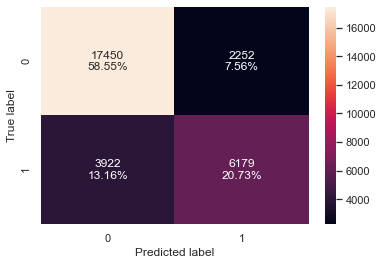

In [68]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_train5, y_train)

In [69]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg6, X_train5, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79284,0.611722,0.732891,0.666847


#### ROC-AUC

* ROC-AUC on training set

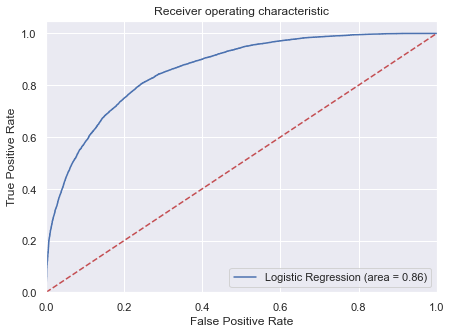

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logit_roc_auc_train = roc_auc_score(y_train, lg6.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [71]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train5))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.30337818225666874


### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Checking model performance on training set

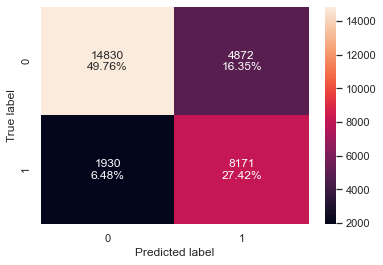

In [72]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg6, X_train5, y_train, threshold=optimal_threshold_auc_roc
)

In [73]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg6, X_train5, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.771768,0.80893,0.626466,0.706101


* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

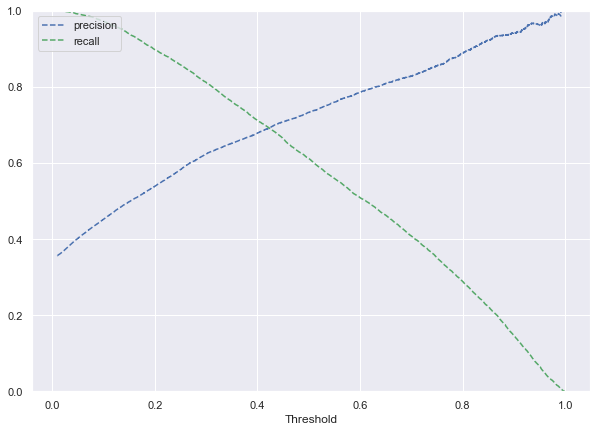

In [74]:
from sklearn.metrics import precision_recall_curve

y_scores = lg6.predict(X_train5)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.4, we get balanced recall and precision.

In [75]:
# setting the threshold
optimal_threshold_curve = 0.58

#### Checking model performance on training set

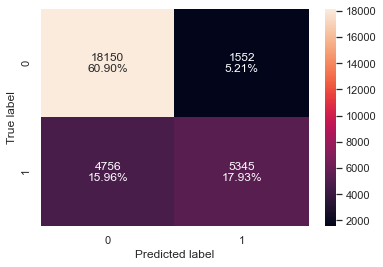

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_train5, y_train, threshold=optimal_threshold_curve)

In [77]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg6, X_train5, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.788343,0.529156,0.774975,0.628898


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.40 and here we get 0.58 as the optimal threshold.

### Model Performance Summary

In [78]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.37 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.33 Threshold,Logistic Regression-0.37 Threshold
Accuracy,0.792840,0.771768,0.788343
Recall,0.611722,0.808930,0.529156
Precision,0.732891,0.626466,0.774975
F1,0.666847,0.706101,0.628898


### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [79]:
X_test5 = X_test[list(X_train5.columns)]

**Using model with default threshold**

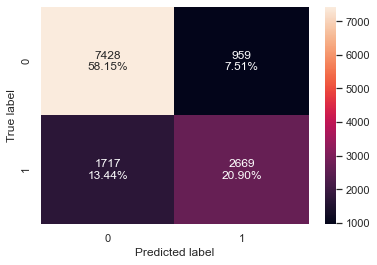

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test5, y_test)

In [81]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg6, X_test5, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.790496,0.608527,0.735667,0.666084


* ROC curve on test set

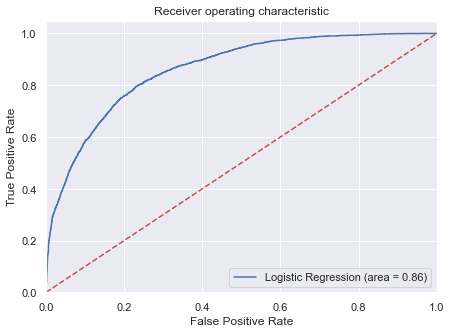

In [82]:
logit_roc_auc_train = roc_auc_score(y_test, lg6.predict(X_test5))
fpr, tpr, thresholds = roc_curve(y_test, lg6.predict(X_test5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.76** 

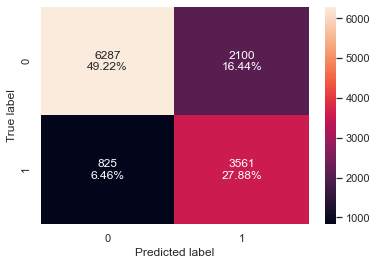

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test5, y_test, threshold=optimal_threshold_auc_roc)

In [84]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg6, X_test5, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.771001,0.811902,0.629041,0.708868


**Using model with threshold = 0.58**

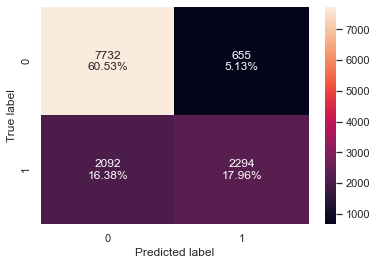

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test5, y_test, threshold=optimal_threshold_curve)

In [86]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg6, X_test5, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.784937,0.523028,0.777891,0.625494


### Model performance summary

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.792840,0.771768,0.788343
Recall,0.611722,0.808930,0.529156
Precision,0.732891,0.626466,0.774975
F1,0.666847,0.706101,0.628898


In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.790496,0.771001,0.784937
Recall,0.608527,0.811902,0.523028
Precision,0.735667,0.629041,0.777891
F1,0.666084,0.708868,0.625494


### Conclusion
* We have been able to build a predictive model that can be used by the hotel to find the customers/guests who will cancel and not cancel their bookings with an f1_score of 0.66 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of some levels of market segments, lead_time, arrival _month, no. of special requests, Average price per and no. of nights are positive an increase in these will lead to increase in chances of a guest not cancelling his/her booking.

## Building a Decision Tree model

### Data Preparation for Decision Tree Model

In [89]:
hotel_data.head() # view first 5 rows of the dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [90]:
hotel_data.info() # check data type of columns again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

In [91]:
# replacing categorical values with values in an ordering form 0,1,2,3 etc.
replaceStruct = {"booking_status": {"Not_Canceled": 0, "Canceled": 1},
                 "type_of_meal_plan": {"Not Selected": -1, "Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3": 3},
                 "room_type_reserved": {"Room_Type 1": 1, "Room_Type 2": 2, "Room_Type 3": 3, "Room_Type 4": 4, 
                                        "Room_Type 5": 5, "Room_Type 6": 6, "Room_Type 7":7},
                 "market_segment_type": {"Offline": 1, "Online": 2, "Corporate": 2, "Complementary": 4, "Aviation": 5}
                }

In [92]:
hotel_data2 =hotel_data.replace(replaceStruct)
hotel_data2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,0
1,2,0,2,3,-1,0,1,5,2018,11,6,2,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,1
4,3,0,0,3,-1,0,1,277,2019,7,13,2,0,0,0,89.10,2,1


In [93]:
hotel_data2.info() # view data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  int64  
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  int64  
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

## Split Data

In [94]:
X = hotel_data2.drop("booking_status" , axis=1) # Features
y = hotel_data2.pop("booking_status") # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [95]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(29803, 17) (12773, 17)


In [96]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 29803
Number of rows in test data = 12773


In [97]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.661074
1    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.656619
1    0.343381
Name: booking_status, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a guest will cancel a booking but in reality the guest did not cancel.
2. Predicting a guest will not cancel a booking but in reality the person canceled the booking.

### Which case is more important? 
* Both the cases are important as:

* If we predict a guest will cancel a booking but actually the booking wasn't canceled then the Hotel is not able to plan packages for such customers and may eventually loose the customer which means lose of revenue to the Hotel.

* If we predict a guest will not cancel a booking but actually cancels the booking that Hotel will not be able make  available the benefits of a non-cancelled booking to a customer who did not cancel.

### How to reduce this loss i.e need to reduce False Negatives?
*  ``recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [98]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [99]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [100]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [101]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking model performance on training set

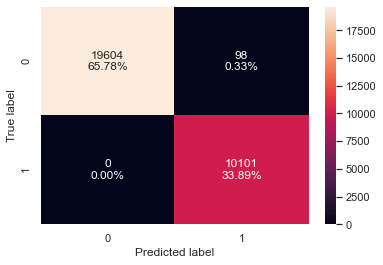

In [102]:
confusion_matrix_sklearn(model, X_train, y_train)

- 19604 were predicted to not cancel and actually did not cancel (True Positive)
- 10101 canceled and were predicted to have canceled (True Negative)
- 98 are wrong predictions. there really did not cancel but were predicted to have canceled (False Positive)
- 0 they did cancel but were predicted to have not canceled (False Negative)

In [103]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

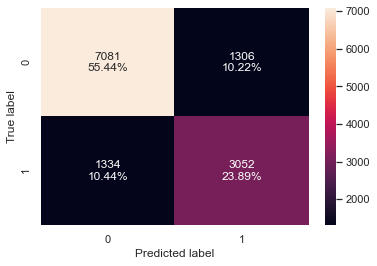

In [104]:
confusion_matrix_sklearn(model, X_test, y_test)

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [105]:
## creating a list of column names
feature_names = X_train.columns.to_list()

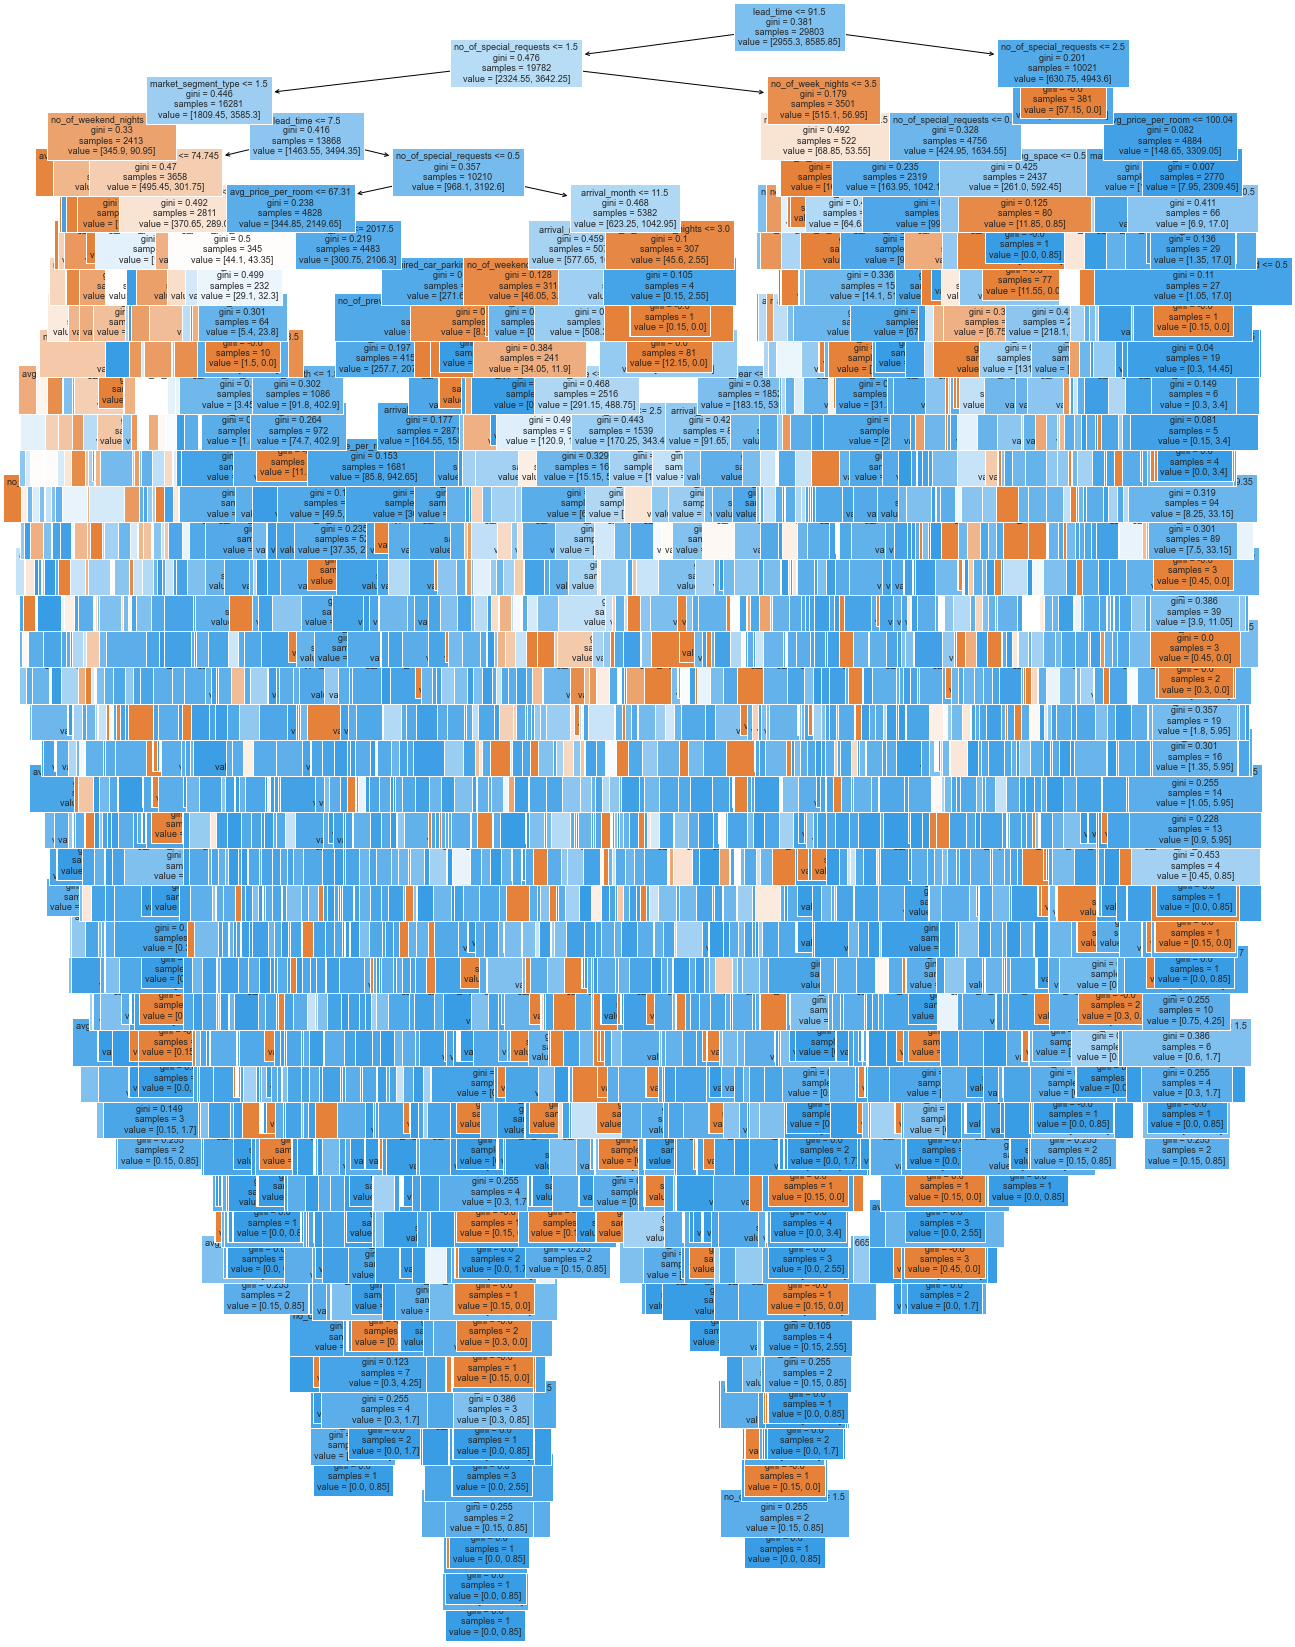

In [106]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- This tree is too complicated as it is beginning to fit the noise.

In [107]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 91.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- avg_price_per_room <= 210.78
|   |   |   |   |   |--- lead_time <= 90.50
|   |   |   |   |   |   |--- arrival_year <= 2017.50
|   |   |   |   |   |   |   |--- weights: [31.95, 0.00] class: 0
|   |   |   |   |   |   |--- arrival_year >  2017.50
|   |   |   |   |   |   |   |--- weights: [104.55, 0.00] class: 0
|   |   |   |   |   |--- lead_time >  90.50
|   |   |   |   |   |   |--- arrival_month <= 4.00
|   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |--- arrival_month >  4.00
|   |   |   |   |   |   |   |--- weights: [1.20, 0.00] class: 0
|   |   |   |   |--- avg_price_per_room >  210.78
|   |   |   |   |   |--- no_of_adults <= 2.50
|   |   |   |   |   |   |--- weights: [0.00, 3.40] class: 1
|   |   |   |   |   |--- no_of_adults >  2.50
|   |   |   |   |   |   |--- weights: [0.1

In [108]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.295440
avg_price_per_room                    0.146812
no_of_special_requests                0.145966
arrival_date                          0.099895
arrival_month                         0.079052
market_segment_type                   0.058855
no_of_week_nights                     0.053909
no_of_weekend_nights                  0.030695
arrival_year                          0.017571
no_of_adults                          0.016934
type_of_meal_plan                     0.015241
room_type_reserved                    0.015014
required_car_parking_space            0.012212
no_of_children                        0.006149
no_of_previous_bookings_not_canceled  0.003044
repeated_guest                        0.002932
no_of_previous_cancellations          0.000278


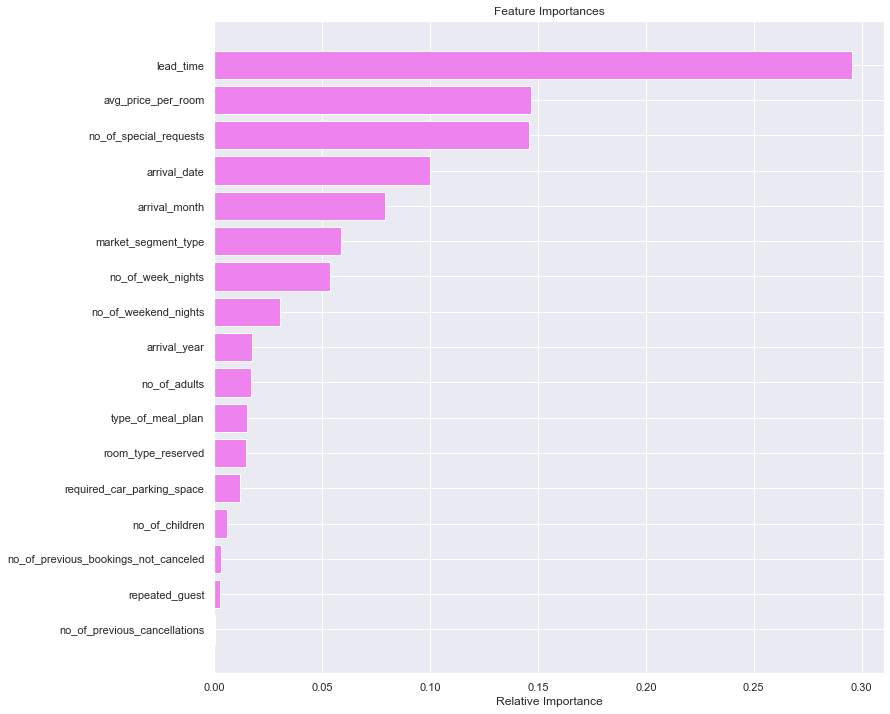

In [109]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time which is Number of days between the date of booking and the arrival date is the most important variable for predicting the guest default compared to features with 0.0

***The tree above is very complex, such a tree often overfits.**

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [110]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              "criterion": ["gini"],
              "splitter": ["best"],
              'min_impurity_decrease': [0.00001, 0.0001, 0.01]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=2,
                       max_leaf_nodes=5, min_impurity_decrease=1e-05,
                       random_state=1)

#### Checking performance on training set

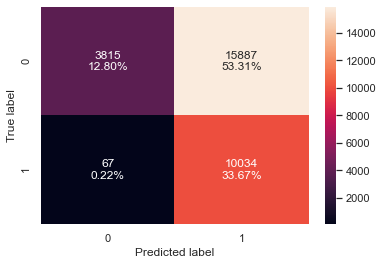

In [111]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [112]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))

Recall Score: 0.9933669933669934
Accuracy on training set :  0.46468476327886454
Accuracy on test set :  0.4650434510295154


* Recall on training set has reduced from 1 to 0.99. This is not a good improvement because the model is still overfitting.
* It is okay for training to be slightly better than testing.
* Recall values on test and training set is not great 

## Visualizing the Decision Tree

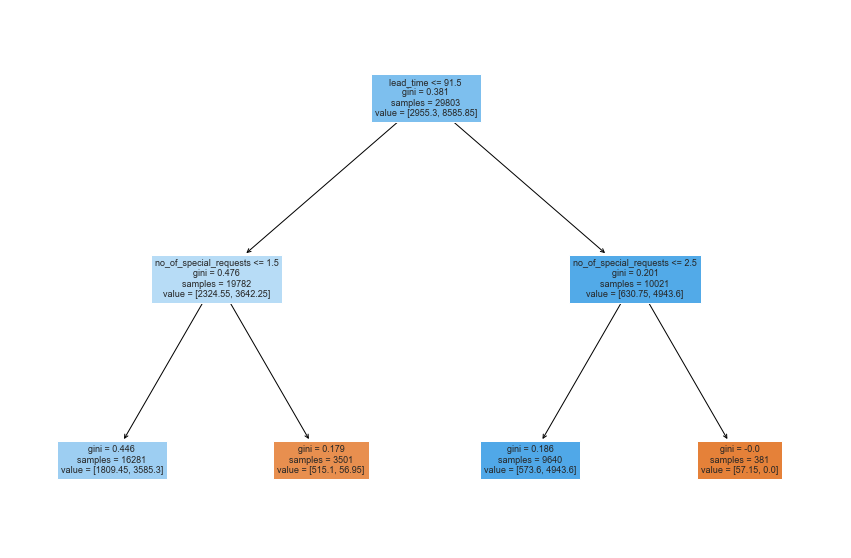

In [113]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [114]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 91.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- weights: [1809.45, 3585.30] class: 1
|   |--- no_of_special_requests >  1.50
|   |   |--- weights: [515.10, 56.95] class: 0
|--- lead_time >  91.50
|   |--- no_of_special_requests <= 2.50
|   |   |--- weights: [573.60, 4943.60] class: 1
|   |--- no_of_special_requests >  2.50
|   |   |--- weights: [57.15, 0.00] class: 0



* The tree has become readable now but the recall on test set has not improved.

In [115]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.511233
no_of_special_requests                0.488767
arrival_month                         0.000000
avg_price_per_room                    0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
market_segment_type                   0.000000
arrival_date                          0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
arrival_year                          0.000000


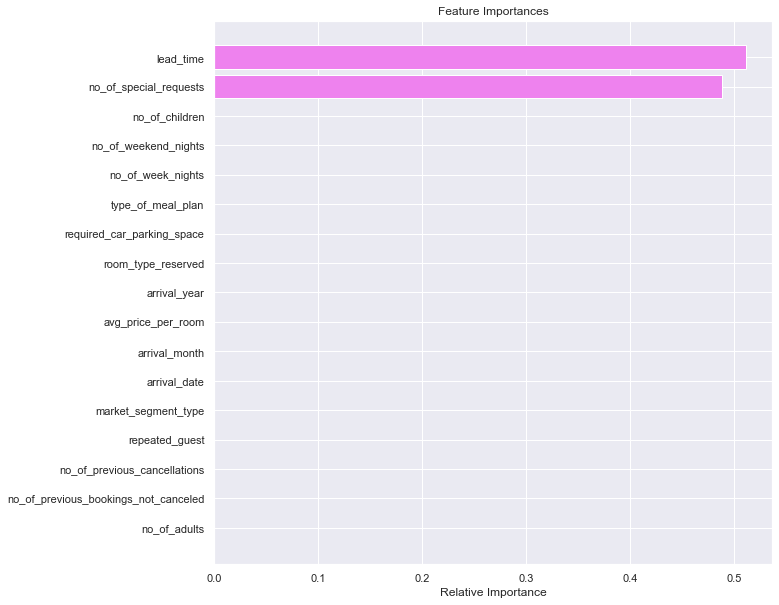

In [116]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* In tuned decision tree lead time is the most important variable.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [117]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [118]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.003288
1,0.000000,0.003288
2,0.000000,0.003288
3,0.000000,0.003288
4,0.000000,0.003288
...,...,...
2044,0.008721,0.304387
2045,0.013059,0.317446
2046,0.018208,0.353862
2047,0.019770,0.373632


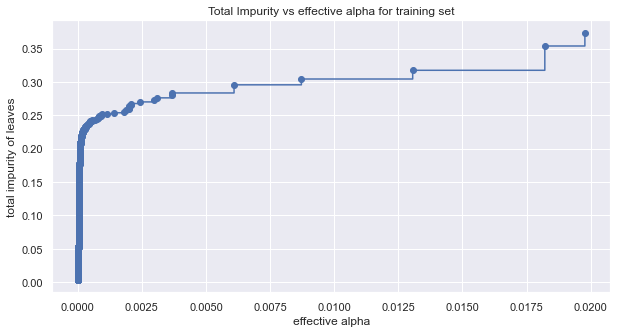

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [120]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07447795787334094


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

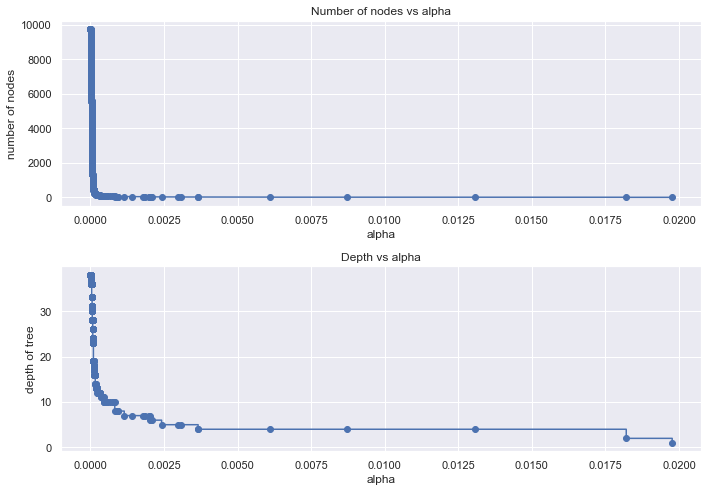

In [121]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [122]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [123]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [124]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

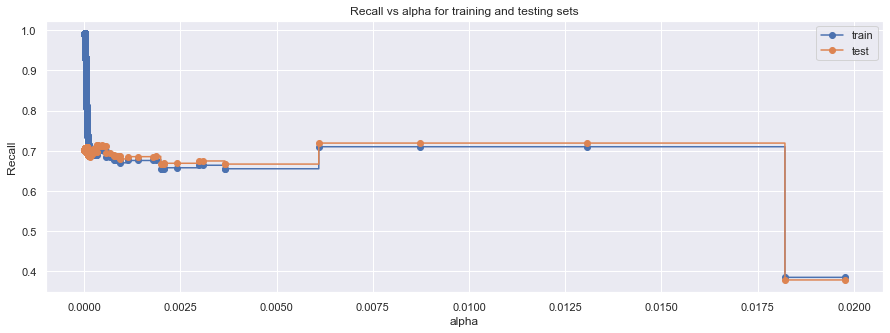

In [125]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.0135 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.0063 retaining information and getting higher recall.**

In [126]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006096895672817775, random_state=1)


In [127]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006096895672817775, random_state=1)

#### checking performance on training set

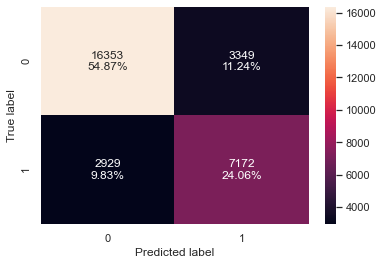

In [128]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [129]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.71002871002871


#### checking performance on test set

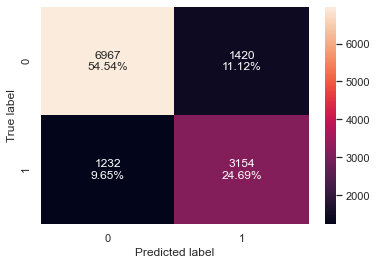

In [130]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [131]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.7191062471500228


### Visualizing the Decision Tree

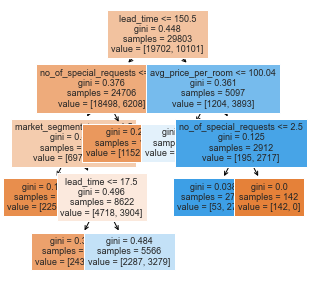

In [132]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a hotel would not be able to use it to actually target the potential customers.

**Creating model with 0.002 ccp_alpha**

In [133]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.0063, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0063, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

#### Checking performance on the training set

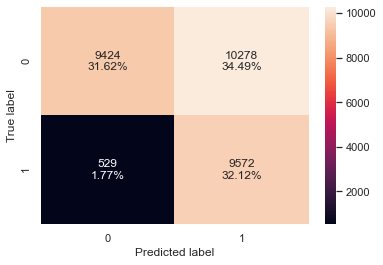

In [134]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [135]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9476289476289477


#### Checking performance on the test set

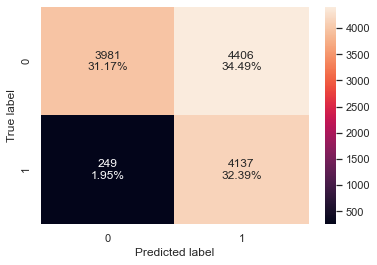

In [136]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [137]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9432284541723667


* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

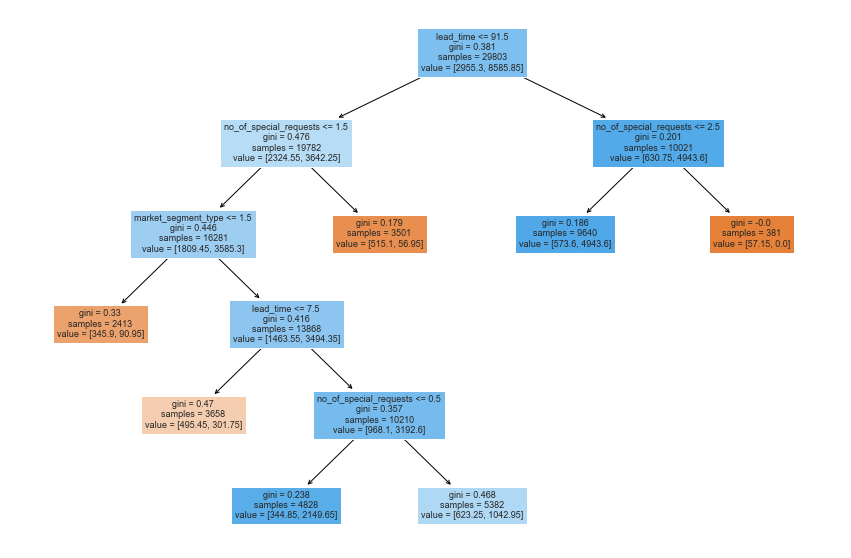

In [138]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [139]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 91.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- weights: [345.90, 90.95] class: 0
|   |   |--- market_segment_type >  1.50
|   |   |   |--- lead_time <= 7.50
|   |   |   |   |--- weights: [495.45, 301.75] class: 0
|   |   |   |--- lead_time >  7.50
|   |   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |   |--- weights: [344.85, 2149.65] class: 1
|   |   |   |   |--- no_of_special_requests >  0.50
|   |   |   |   |   |--- weights: [623.25, 1042.95] class: 1
|   |--- no_of_special_requests >  1.50
|   |   |--- weights: [515.10, 56.95] class: 0
|--- lead_time >  91.50
|   |--- no_of_special_requests <= 2.50
|   |   |--- weights: [573.60, 4943.60] class: 1
|   |--- no_of_special_requests >  2.50
|   |   |--- weights: [57.15, 0.00] class: 0



In [140]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.468136
no_of_special_requests                0.387627
market_segment_type                   0.144237
arrival_month                         0.000000
avg_price_per_room                    0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
arrival_year                          0.000000


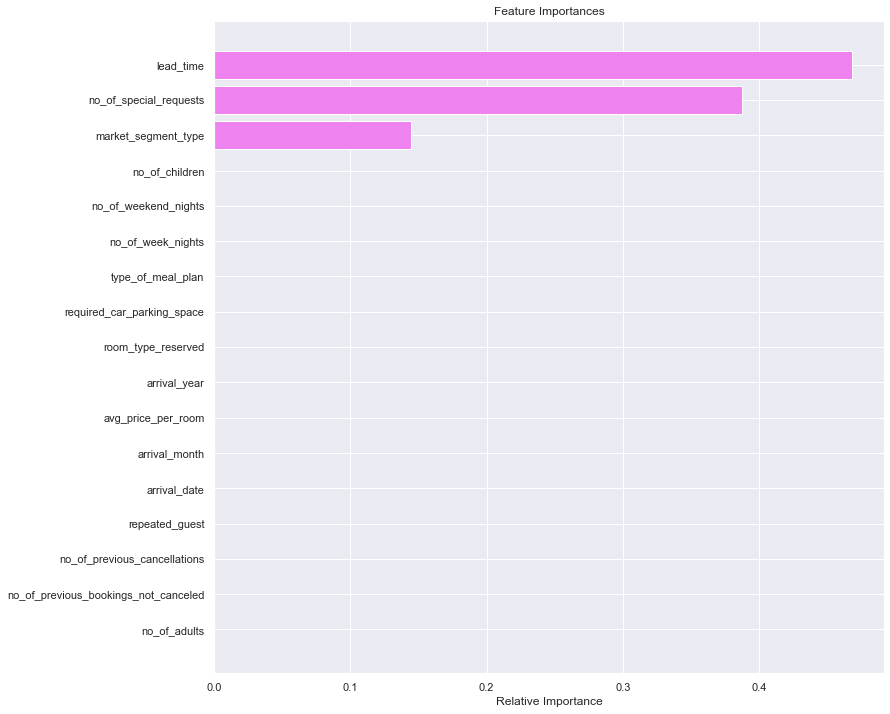

In [141]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time and No. of special requests are the top two important features to predict booking cancelation.

### Comparing all the decision tree models

In [142]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.993367
2,0.947629


In [ ]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusions

- The cancellation and its prediction is a real problem for the tourism industry and good understanding for this problem and the features that related with will be very useful to decrease the investments' risk of this important industry.
- Features which are most important to predict hotel booking cancellations are, lead_time, arrival _month, no. of special requests, Average price per, no. of nights and market segment.
- Also online booking websites are encouraging more and more customers to book more hotels and then decide which one they will stay, participating in the increase of the number of cancellations. But technological advancements is not the only reason hotels see more cancellations. It turns out that psychology plays a role in this as well. Consumers are always looking for ways to minimize their cost of buying something, so if they found out that they can buy the same thing at a lower price than they paid for, they would attempt to cancel and repurchase, and that’s what usually happens with hotel bookings.
- Most bookings were made from July to August. And the least bookings were made at the start and end of the year.


### Recommendations

- May-August happens to be the busiest months but so the hotels should target more customers and try to do more business during these times.
- Most guests do not return but as these customers have already visited once, advertisements should be targeted in such ways so they are bound to return the next time they visit. The customers could also be offered special benefits if they do return to stay.
- Most guest make special request while booking, this has shown to reduce the cancelling rate by guest. There should more Advertising on different booking platform on special request options. This will increase the number of guest who book and not cancel Considering the add-ons that will be gotten along with the money paid.
- Considering most booking are done by adults who are accompanied by either partner or child/children, it would be important to make packages available to accomodate couples or family. 